In [ ]:
pip install numpy

In [ ]:
pip install nltk


In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Youssef
[nltk_data]     Tfifhq\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [3]:
import praw

reddit = praw.Reddit(client_id = 'R6uOcs3UtcvgJ8tKWbLe6Q',
                     client_secret = '8JB0vVIs8JTy7ovV03GFt_AKKl6spQ',
                     user_agent = 'Streaming tutorial thingy (by NOUR)')

In [4]:
headlines = set()


In [5]:
for submission in reddit.subreddit('Formula1').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

975


# Labeling our Data
rank a piece of text as positive, negative or neutral using a lexicon of positive and negative words.

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA # Sentiment Intensity Analyzer (SIA) to categorize our headlines

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line) #use the polarity_scores method to get the sentiment.
    pol_score['headline'] = line 
    results.append(pol_score)

pprint(results[:10], width=100)

[{'compound': 0.0,
  'headline': 'Formula 1 collection at "Museo dell\'automobile" in Turin',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.0258,
  'headline': "Binotto says Ferrari 'much better prepared' for development war than in previous "
              'seasons',
  'neg': 0.209,
  'neu': 0.535,
  'pos': 0.257},
 {'compound': 0.0,
  'headline': "[Formula 1] POV: You're @PierreGASLY driving around the incredible @ausgrandprix "
              'circuit!',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': 'A Lap of the New Albert Park F1 Circuit',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.5994,
  'headline': "[OT] What's next for Formula E's defending champion? - The Race",
  'neg': 0.0,
  'neu': 0.698,
  'pos': 0.302},
 {'compound': -0.2263,
  'headline': 'DR3 x St Hugo: A limited edition wine by Daniel Ricciardo',
  'neg': 0.192,
  'neu': 0.808,
  'pos': 0.0},
 {'compound': 0.0,
  'headline': '[TracingInsights] - Australian GP 

In [7]:
df = pd.DataFrame.from_records(results)
df

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,"Formula 1 collection at ""Museo dell'automobile..."
1,0.209,0.535,0.257,-0.0258,Binotto says Ferrari 'much better prepared' fo...
2,0.000,1.000,0.000,0.0000,[Formula 1] POV: You're @PierreGASLY driving a...
3,0.000,1.000,0.000,0.0000,A Lap of the New Albert Park F1 Circuit
4,0.000,0.698,0.302,0.5994,[OT] What's next for Formula E's defending cha...
...,...,...,...,...,...
970,0.000,1.000,0.000,0.0000,Audi and Porsche in Formula 1? Decision approa...
971,0.000,0.708,0.292,0.5106,Leclerc vows there’s ‘more to come’ after stro...
972,0.000,1.000,0.000,0.0000,[Medland] It’s a three-year deal initially for...
973,0.000,0.707,0.293,0.4404,McLaren couldve competed for the championship ...


In [8]:
#positive label of 1 if the compound is greater than 0.2, and a label of -1 if compound is less than -0.2. Everything else will be 0.
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,"Formula 1 collection at ""Museo dell'automobile...",0
1,0.209,0.535,0.257,-0.0258,Binotto says Ferrari 'much better prepared' fo...,0
2,0.000,1.000,0.000,0.0000,[Formula 1] POV: You're @PierreGASLY driving a...,0
3,0.000,1.000,0.000,0.0000,A Lap of the New Albert Park F1 Circuit,0
4,0.000,0.698,0.302,0.5994,[OT] What's next for Formula E's defending cha...,1
...,...,...,...,...,...,...
970,0.000,1.000,0.000,0.0000,Audi and Porsche in Formula 1? Decision approa...,0
971,0.000,0.708,0.292,0.5106,Leclerc vows there’s ‘more to come’ after stro...,1
972,0.000,1.000,0.000,0.0000,[Medland] It’s a three-year deal initially for...,0
973,0.000,0.707,0.293,0.4404,McLaren couldve competed for the championship ...,1


In [9]:
commands = (
            # Table 1
            '''Create Table RedditDim(Reddit_Id SERIAL  PRIMARY KEY,
                                         headline TEXT,
                                         label INT
                                         );''',
            )

In [10]:
import psycopg2
import psycopg2.extras as extras
# Connection to database server
conn = psycopg2.connect(host="localhost",database="FormulaOne",port=5432,user='postgres',password='root')

In [11]:
# Create cursor to execute SQL commands
cur = conn.cursor()

# Execute SQL commands
for command in commands:
    # Create tables
    cur.execute(command)

# Close communication with server
conn.commit()
cur.close()
conn.close()

In [12]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_labels.csv', mode='a', encoding='utf-8', index=False)

In [13]:
# # Insert Tweet data into database

def execute_values(conn, df, table):
  
    tuples = [tuple(x) for x in df.to_numpy()]
  
    cols = ','.join(list(df.columns))
    # SQL query to execute
    query = "INSERT INTO %s(%s) VALUES %%s" % (table, cols)
    cursor = conn.cursor()
    try:
        extras.execute_values(cursor, query, tuples)
        conn.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        conn.rollback()
        cursor.close()
        return 1
    print("the dataframe is inserted")
    cursor.close()

In [14]:
conn = psycopg2.connect(host="localhost",database="FormulaOne",port=5432,user='postgres',password='root')
execute_values(conn, df2, 'RedditDim')


the dataframe is inserted


In [15]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:10], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:10], width=200)

Positive headlines:

["[OT] What's next for Formula E's defending champion? - The Race",
 'Valtteri Bottas admits that the strong early form of his Alfa Romeo Formula 1 team in 2022 represents “the best case scenario” in terms of what he expected going into the season.',
 '2022 Australian Grand Prix - Qualifying Discussion',
 'In 1984/5 if you got pole you got a free vespa!',
 'Lewis Hamilton is the ONLY driver to take pole position at Albert Park (Melbourne) in the turbo-hybrid era. However, he has managed to win just one of those six races.',
 "Just your friendly fire marshal redditor checking in to say I'm ready for the weekend!",
 '2022 Australian Grand Prix - Free Practice 2 Results',
 '[Mohammed Ben Sulayem] 40 years after its last Grand Prix, Las Vegas is back in F1! I welcome this good news for the development of motor sport in the USA and the Americas.',
 '[Alex Albon] This week, I was fortunate enough to visit the Wat Sakaeo orphanage where I got to meet hundreds of amazing a

In [16]:
# check how many total positives and negatives we have in this dataset
#nb
print(df.label.value_counts())
#prc
print(df.label.value_counts(normalize=True) * 100)

 0    573
 1    302
-1    100
Name: label, dtype: int64
 0    58.769231
 1    30.974359
-1    10.256410
Name: label, dtype: float64


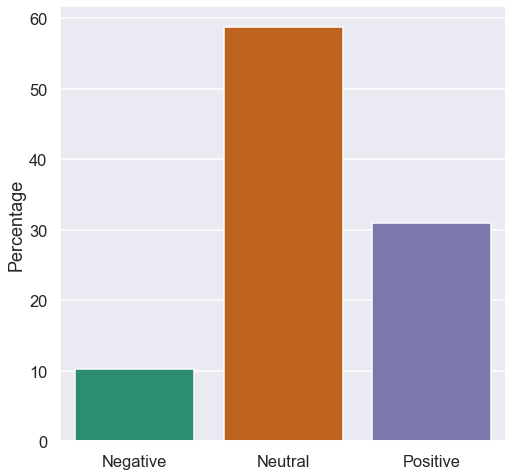

In [17]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Youssef
[nltk_data]     Tfifhq\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Tokenizers and Stopwords

In [19]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Youssef
[nltk_data]     Tfifhq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])
#irrelevant to text sentiment and don't provide any valuable information

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


# Word Distributions

In [22]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [23]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

NameError: name 'tokenizer' is not defined

In [ ]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [ ]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [ ]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

In [ ]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

In [ ]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()